# setup

In [136]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')



# Load dataset

In [137]:
train = pd.read_csv('dataset/train.csv')
valid = pd.read_csv('dataset/val.csv')
test = pd.read_csv('dataset/test.csv')

train.drop('ID', axis = 1, inplace = True)
valid.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)


In [138]:
target = valid['Class']
valid = valid.drop('Class', axis = 1)

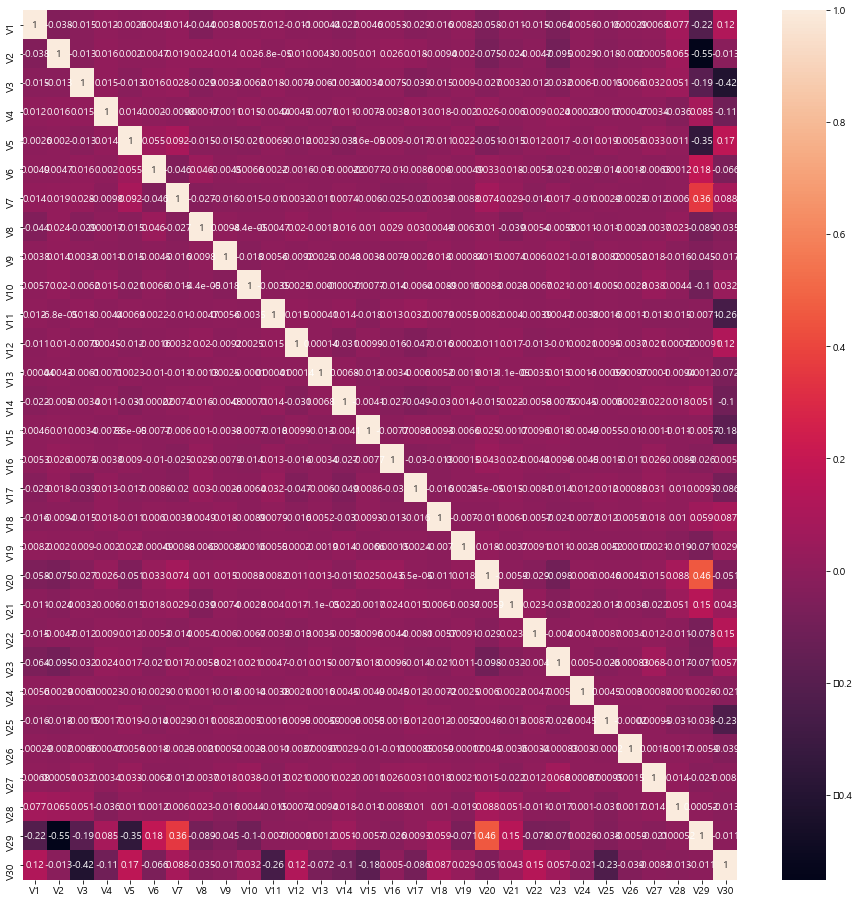

In [247]:
plt.figure(figsize = (16, 16))
sns.heatmap(valid.corr(), annot = True)
plt.show()

In [192]:
from imblearn.under_sampling import NearMiss
nm_model = NearMiss(version = 2)

X_valid, y_valid = nm_model.fit_sample(valid, target)
X_valid = pd.DataFrame(X_valid, columns = valid.columns)

In [196]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_valid, y_valid)
valid_preds = xgb_clf.predict(X_valid)
pd.crosstab(valid_preds, y_valid)

[19:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Class,0,1
row_0,,
0,30,0
1,0,30


In [323]:
sig_features = xgb_clf.feature_importances_.argsort()[::-1][0:6]
sig_features = ['V' + str(s+1) for s in sig_features]
sig_features

['V11', 'V16', 'V14', 'V28', 'V5', 'V9']

In [324]:
len(train_model)

113842

In [325]:
train_model = train[sig_features]
train_model

,V11,V16,V14,V28,V5,V9
0,0.624501,-2.890083,-0.165946,-0.059752,-0.503198,-1.514654
1,-0.226487,-1.059647,-0.287924,0.061458,-0.010309,-1.387024
2,1.341262,0.401726,-0.137134,0.081080,0.420987,-0.568671
3,-0.619468,-0.076127,-1.323865,-1.085339,0.948934,0.615375
4,-0.705117,-0.210077,0.074355,0.142404,2.669599,-0.392048
...,...,...,...,...,...,...
113837,-1.052365,1.067864,1.288401,1.232864,-4.586669,4.893089
113838,-1.134176,-0.549982,0.002019,-0.041068,-0.035300,0.666458
113839,-0.612982,-0.245496,0.237948,0.081265,0.244531,0.106234
113840,0.644837,0.599628,-0.731707,0.068803,1.130314,-0.204064


In [326]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators = 125, max_samples=(len(train_model)),
                        contamination=target.mean()*0.8, random_state=42, verbose=0)
model.fit(train_model)

IsolationForest(contamination=0.0008432295692502285, max_samples=113842,
                n_estimators=125, random_state=42)

In [327]:
pred = model.predict(valid[sig_features])
pred = np.maximum(0, pred)
pred = 1 - pred

In [328]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
val_score = f1_score(pred, target, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(pred, target))


Validation F1 Score : [0.7828166559008255]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28439
           1       0.50      0.65      0.57        23

    accuracy                           1.00     28462
   macro avg       0.75      0.83      0.78     28462
weighted avg       1.00      1.00      1.00     28462



In [329]:
pd.crosstab(pred, target)

Class,0,1
row_0,,
0,28424,15
1,8,15


In [333]:
valid

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,0.011106,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,-0.040513,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,...,0.228159,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622
28458,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,...,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693
28459,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763
28460,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928


In [345]:
incor = valid[(target == 1)&(pred == 0)].mean(axis = 0).to_frame()
cor = valid[(target == 1)&(pred == 1)].mean(axis = 0).to_frame()

In [348]:
pd.concat([cor, incor], axis = 1)

,0,0
V1,-11.767320,-1.213141
V2,7.977058,1.596079
V3,-16.590490,-3.014353
V4,8.057537,2.859583
V5,-9.054994,-0.180730
V6,-2.579938,-1.089525
V7,-14.058507,-1.340095
V8,2.179320,0.444982
V9,-5.225920,-1.410587
V10,-12.299319,-2.850891


In [321]:
final_preds = model.predict(test[sig_features])
final_preds = np.maximum(0, final_preds)
final_preds = 1 - final_preds
final_preds

array([0, 0, 0, ..., 0, 0, 0])

In [306]:
submission = pd.read_csv('dataset/sample_submission.csv')
submission['Class'] = final_preds
submission

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,0
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,0
...,...,...
142498,0x4587f,0
142499,0x45880,0
142500,0x45884,0
142501,0x45885,0


In [307]:
submission.to_csv('submission.csv', index = False)